In [1]:
import xarray as xr
#import numpy as np
#import pandas as pd

#import os.path
#from datetime import datetime, timedelta, date
#import time

import matplotlib.pyplot as plt
from nmme_utils import *

In [2]:
# Eliminate Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set xarray to keep attributes
xr.set_options(keep_attrs=True)  

In [4]:
def is_month(month):
   return (month == 6)

## Models and Forecast Settings

In [5]:
models_list,_,_,_=initModels()

## File Paths

In [6]:
url='http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME'

### Make a nmme_fcst `xarray.Dataset` containing all models + MME for months 1-9

In [7]:
print('PROCESSING CLIMOS FOR: ')

# Loop over all the Models
for imodel,nmme_model in enumerate(models_list):
    
    # Get the model, group, variables, and levels from the dictionary 
    varnames=nmme_model['varnames']
    levstrs=nmme_model['levstrs']
    model=nmme_model['model']
    group=nmme_model['group']
    
    print('===> ',model)
    
    # Loop over variables for this model
    for varname,levstr in zip(varnames,levstrs):
        
        print(varname,levstr)
        ofname='/mcs/scratch/kpegion/nmme/climatology/monthly/1991-2020/'+model+'.'+varname+'_'+levstr+'.clim.1991-2020.nc'

        # Read Data
        if group == "":
            if (model=='COLA-RSMAS-CCSM4'):
                hcstURL=url+'/.'+model+'/.MONTHLY'+'/.'+varname 
                fcstURL=url+'/.'+model+'/.MONTHLY'+'/.'+varname
            elif (model=='NCEP-CFSv2'):
                hcstURL=url+'/.'+model+'/.HINDCAST/.PENTAD_SAMPLES/.MONTHLY/.'+varname 
                fcstURL=url+'/.'+model+'/.FORECAST/.EARLY_MONTH_SAMPLES/.MONTHLY/.'+varname
            else:
                hcstURL=url+'/.'+model+'/.HINDCAST/.MONTHLY'+'/.'+varname
                fcstURL=url+'/.'+model+'/.FORECAST/.MONTHLY'+'/.'+varname
        else:
            hcstURL=url+'/.'+group+'/.'+model+'/.HINDCAST/.MONTHLY'+'/.'+varname
            fcstURL=url+'/.'+group+'/.'+model+'/.FORECAST/.MONTHLY'+'/.'+varname
         
        # Get Subsetted Data Using Ingrid
        print("Calling getClimDataViaIngrid")
        ds,ds_hcst,ds_fcst=getClimDataViaIngrid(hcstURL,fcstURL)
        print("Returning getClimDataViaIngrid")
        print(ds)
            
        # Calculate Climos
        print("Calcualting CLIM")
        ds_clim=ds.groupby('S.month').mean()
        print("DONE Calculating CLIM")
        
        # Rename and clean up coordinates
        print("SETTING COORDS")
        ds_clim['L'] = (ds_clim['L'] - 0.5).astype('int')
        ds_clim=ds_clim.rename({'X':'lon','Y':'lat','L':'lead'})  
        ds_clim['lead'].attrs = {'units': 'months'}
        ds_clim['lon'].attrs['units']='degrees_east'
        ds_clim['lat'].attrs['units']='degrees_north'
        if ('Z' in ds_clim.dims):
            ds_clim=ds_clim.drop('Z')
        print("DONE SETTING COORDS")
        print(ofname)
        print(ds_clim)
        
        print("WRITING CLIMATOLOGY")
        ds_clim.to_netcdf(ofname)
 

PROCESSING CLIMOS FOR: 
===>  NCEP-CFSv2
sst sfc
Calling getClimDataViaIngrid
http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NCEP-CFSv2/.FORECAST/.EARLY_MONTH_SAMPLES/.MONTHLY/.sst/[M]average/dods
Returning getClimDataViaIngrid
<xarray.Dataset>
Dimensions:  (Y: 181, L: 10, S: 360, X: 360)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * S        (S) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-11-01 2020-12-01
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    sst      (S, L, Y, X) float64 dask.array<chunksize=(82, 10, 119, 119), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL
Calcualting CLIM
DONE Calculating CLIM
SETTING COORDS
DONE SETTING COORDS
/mcs/scratch/kpegion/nmme/climatology/monthly/1991-2020/NCEP-CFSv2.sst_sfc.clim.1991-2020.nc
<xarray.Dataset>
Dimensions:  (lat: 181, lead: 10, lon: 360, month: 12)
Coor

In [8]:
ds

<xarray.Dataset>
Dimensions:  (Y: 181, L: 10, S: 360, X: 360)
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * S        (S) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-11-01 2020-12-01
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    sst      (S, L, Y, X) float64 dask.array<chunksize=(82, 10, 119, 119), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL

In [9]:
ds=ds.sel(S=slice('1991-01-01','2020-12-31'))
ds_jun = ds['sst'].sel(L=0.5,S=is_month(ds['S.month']))

In [10]:
ds_jun

<xarray.DataArray 'sst' (S: 30, Y: 181, X: 360)>
dask.array<getitem, shape=(30, 181, 360), dtype=float64, chunksize=(10, 119, 119), chunktype=numpy.ndarray>
Coordinates:
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    L        float32 0.5
  * S        (S) datetime64[ns] 1991-06-01 1992-06-01 ... 2019-06-01 2020-06-01
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    pointwidth:          0
    gribfield:           1
    cNZ:                 7
    file_missing_value:  9.999e+20
    standard_name:       sea_surface_temperature
    long_name:           Sea Surface Temperature
    fnname:              maskge
    units:               Celsius_scale
    history:             Averaged over M[0.5, 28.5] minimum 0.0% data present

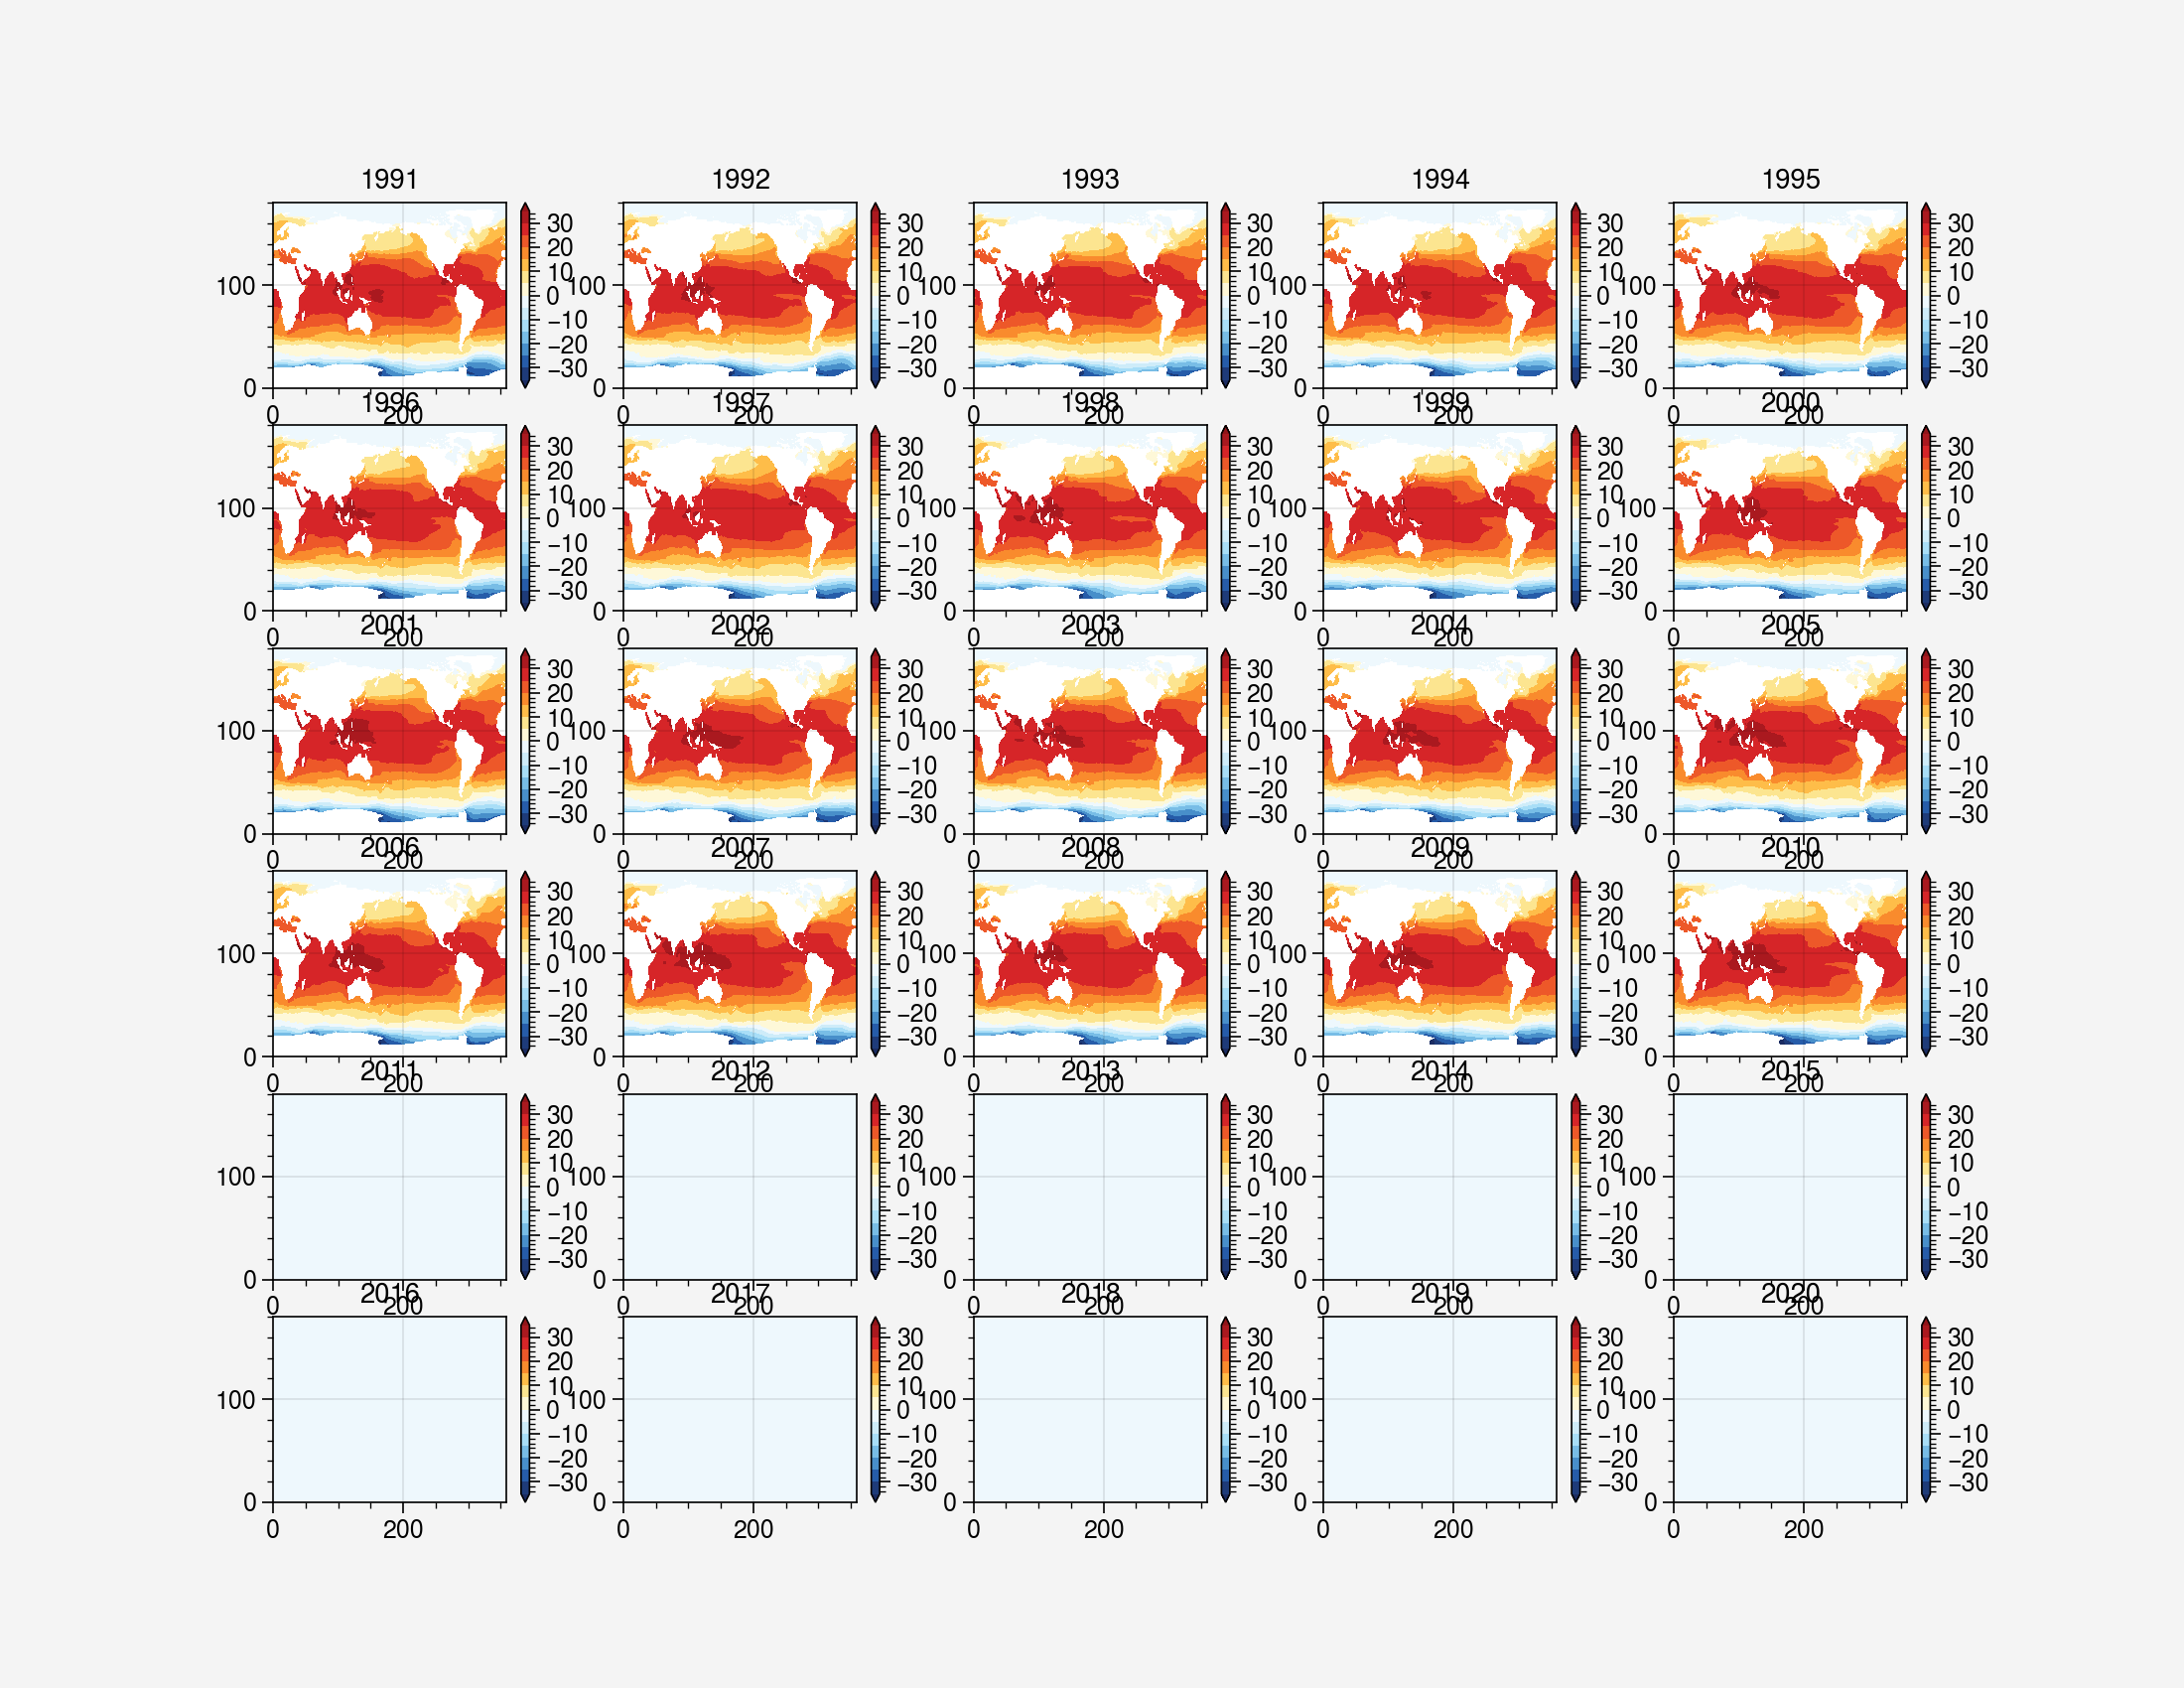

In [11]:
levs=np.arange(-35,36,5)
cmap='ColdHot'

fig = plt.figure(figsize=(11,8.5))

for i,ics in enumerate(ds_jun['S'].values):
    
    plt.subplot(6,5,i+1)
    plt.contourf(ds_jun.sel(S=ics),levs,cmap=cmap,extend='both')
    plt.title(str(i+1991))
    plt.colorbar()

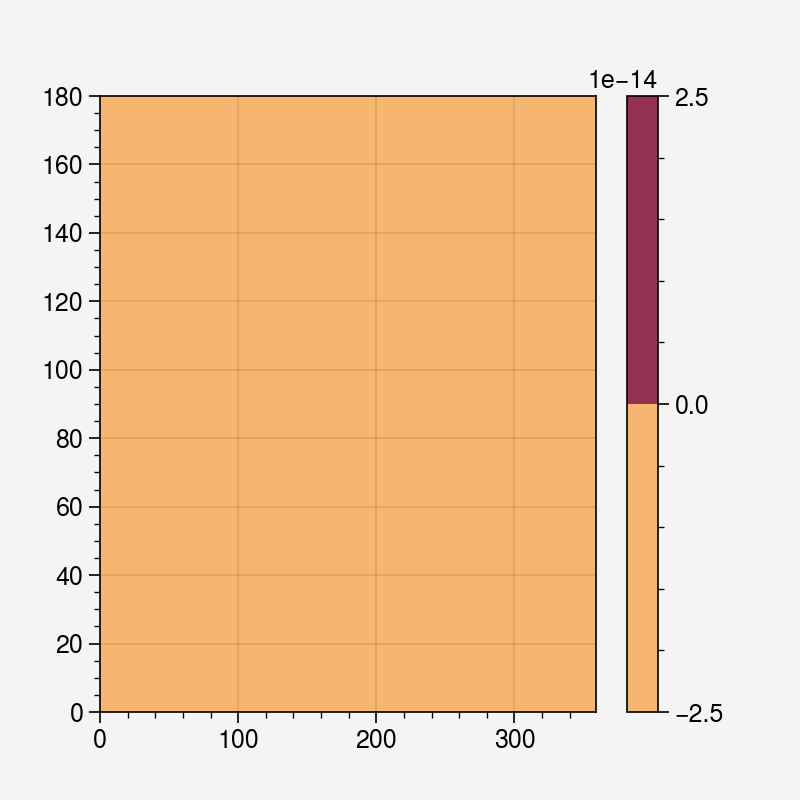

In [17]:
plt.contourf(ds['sst'].sel(L=0.5,S='2011-06-01'))
plt.colorbar()